In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [4]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

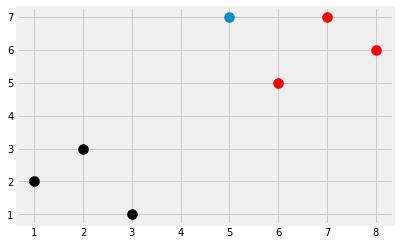

In [5]:
[[plt.scatter(ii[0],ii[1], s=100, color = i)for ii in dataset[i]]for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [16]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distances = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distances, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]

    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)
          

r


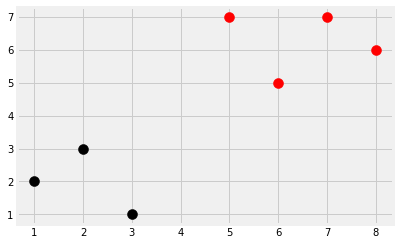

In [7]:
[[plt.scatter(ii[0],ii[1], s=100, color = i)for ii in dataset[i]]for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color = result)
plt.show()

In [11]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9728\3028533049.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


In [12]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [14]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])


In [17]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total +=1

print('Accuracy: ', correct/total)

Accuracy:  0.9496402877697842
